<a href="https://colab.research.google.com/github/NischalRathour/Concept-and-technology-of-AI/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 3.1 Problem- 1: Getting Started with Data Exploration- Some Warm up
 Exercises:
 1. Data Exploration and Understanding:
 • Dataset Overview:
 1. Load the dataset and display the first 10 rows.
 2. Identify the number of rows and columns in the dataset.
 3. List all the columns and their data types.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
#set path of dataframe
worldHappiness=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/concept and technology of AI/Datasets/Assignment/WHR-2024-5CS037.csv")
print("The first row of datatype :")
print(worldHappiness.head(9))

#for number of rows and cols
numOfRow , numOfColume=worldHappiness.shape
print("Number of rows : ",numOfRow);
print("Number of column :",numOfColume);

#To check datatype
dataTypesColumns=worldHappiness.dtypes
print("The data types of dataflame are :\n",dataTypesColumns)


The first row of datatype :
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724                         0.838       0.221   
4

 Basic Statistics:
 1. Calculate the mean, median, and standard deviation for the Score column.
 2. Identify the country with the highest and lowest happiness scores

In [6]:
#basic stats for score datafarem
meanScore=worldHappiness['score'].mean()
medianScore=worldHappiness['score'].median()
standardDeviation=worldHappiness['score'].std()

print(f"The mean of WorldHappines data Score column is  :{meanScore:.2f}")
print(f"The median of WorldHappines data Score column is  :{medianScore :.2f}")
print(f"Standard Deviation of WorldHappiness data Score column is :{standardDeviation: .2f}")

#highest and lowest happiness scores
higestScore=worldHappiness.loc[worldHappiness['score'].idxmax()]
lowestScore=worldHappiness.loc[worldHappiness['score'].idxmin()]


The mean of WorldHappines data Score column is  :5.53
The median of WorldHappines data Score column is  :5.79
Standard Deviation of WorldHappiness data Score column is : 1.17


 Missing Values:
 1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [7]:
missingValue=worldHappiness.isnull().sum()
print("The missing values are : \n",missingValue)

The missing values are : 
 Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


 Filtering and Sorting:
 1. Filter the dataset to show only the countries with a Score greater than 7.5.
 2. For the filtered dataset- Sort the dataset by GDP per Capita in descending order and display the
 top 10 rows

In [8]:
filterData=worldHappiness[worldHappiness['score'] > 7.5]
print("Countries score greater then 7.5 ")
filterData






Countries score greater then 7.5 


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [9]:
sortedDatas=filterData.sort_values(by = 'Log GDP per capita', ascending=False)
print(" Top 10  GDP per Capita in descending order ")
sortedDatas



 Top 10  GDP per Capita in descending order 


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


Adding New Columns:
 1. Create a new column called Happiness Category that categorizes countries into three categories
 based on their Score:
 Low −(Score < 4)
 Medium −(4 ≤ Score ≤ 6)
 High −(Score > 6)

In [10]:
def happiness_Categorgy(score):
  if (score<4):
    return "Low"
  elif (4<=score<=6):
    return "Medium"
  else:
    return "High"

worldHappiness['Happiness Category'] = worldHappiness['score'].apply(happiness_Categorgy)

print("Countries based on happinesss category score:\n")
worldHappiness[['Country name','score','Happiness Category']]

Countries based on happinesss category score:



,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High
...,...,...,...
138,Congo (Kinshasa),3.295,Low
139,Sierra Leone,3.245,Low
140,Lesotho,3.186,Low
141,Lebanon,2.707,Low


 2. Data Visualizations:
 • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.


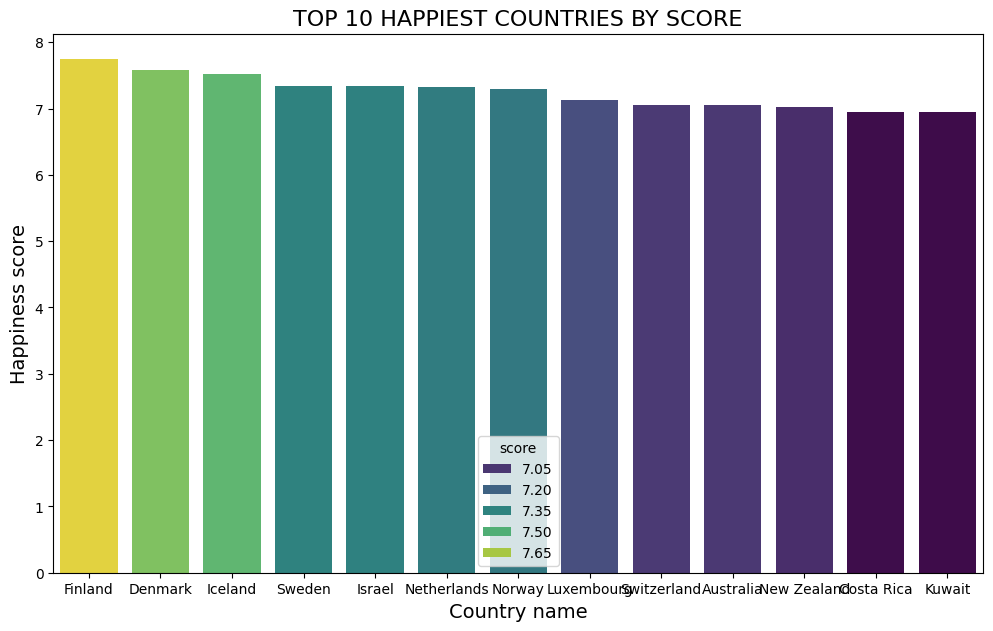

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data by score
Top_10_happiest = worldHappiness.sort_values(by='score', ascending=False).head(13)

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Country name', y='score',hue='score',data=Top_10_happiest, palette='viridis')
plt.title('TOP 10 HAPPIEST COUNTRIES BY SCORE', fontsize=16)
plt.xlabel('Country name', fontsize=14)
plt.ylabel('Happiness score', fontsize=14)

plt.show()

 Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart

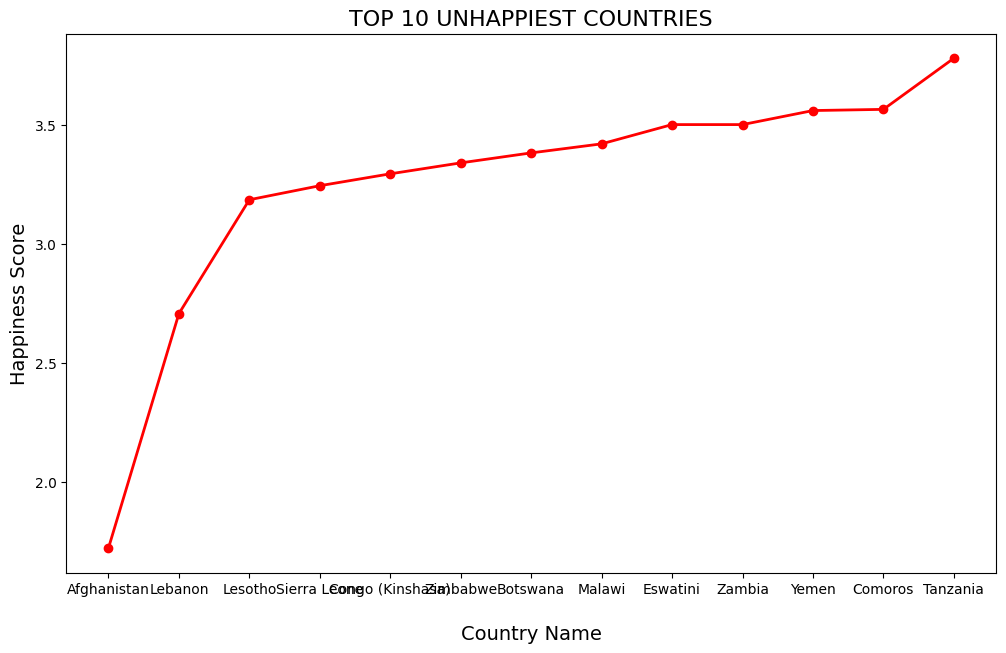

In [12]:
top_10_unhappiestCountry = worldHappiness.sort_values(by='score',ascending=True).head(13)
plt.figure(figsize=(12,7))
plt.plot(top_10_unhappiestCountry['Country name'],top_10_unhappiestCountry['score'],marker='o',color='red',linewidth=2)
plt.title('TOP 10 UNHAPPIEST COUNTRIES', fontsize=16)
plt.xlabel('\nCountry Name', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.show()

 Plot a histogram for the Score column to show its distribution and also interpret.

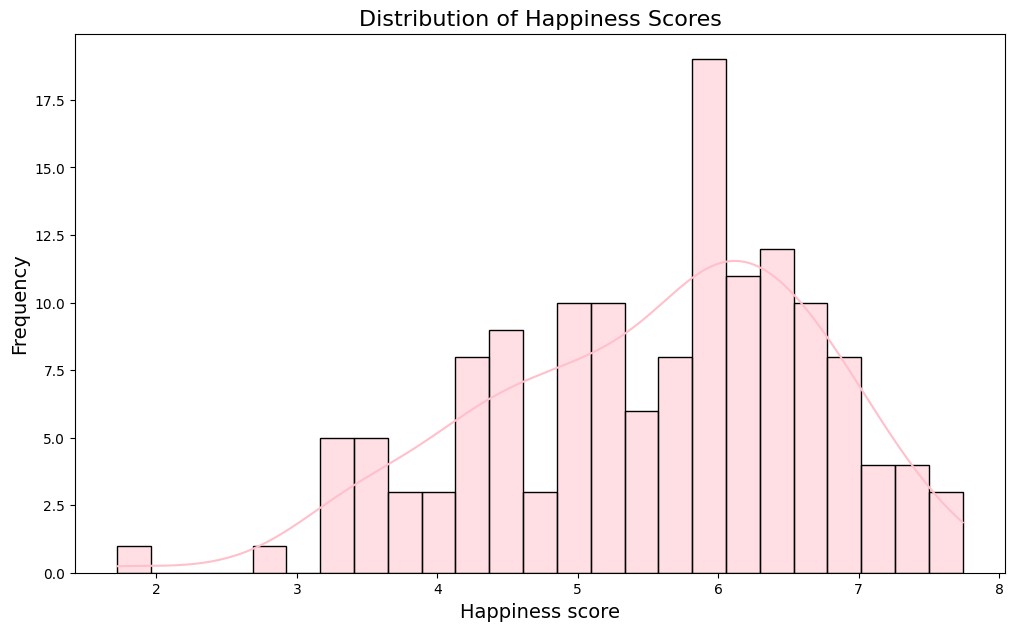

In [13]:
plt.figure(figsize=(12,7))
sns.histplot(worldHappiness['score'], bins=25, kde=True, color='pink')
plt.title('Distribution of Happiness Scores',fontsize=16)
plt.xlabel('Happiness score',fontsize=14)
plt.ylabel('Frequency',fontsize=14)

plt.show()

 Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship

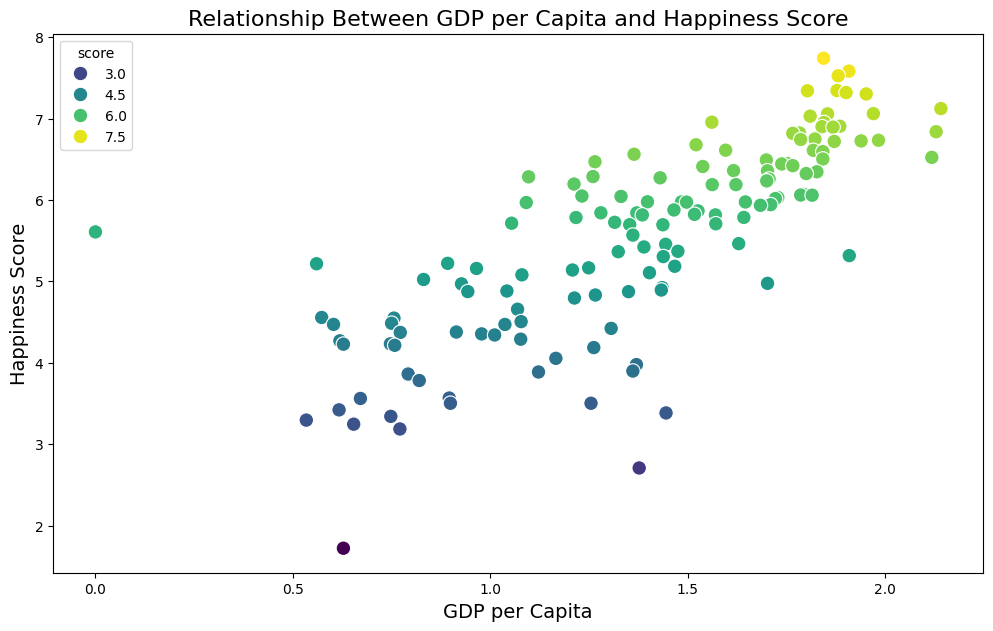

In [15]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Log GDP per capita',y='score',hue='score',data=worldHappiness,palette='viridis',s=110)

plt.title("Relationship Between GDP per Capita and Happiness Score",fontsize=16)
plt.xlabel('GDP per Capita',fontsize=14)
plt.ylabel('Happiness Score',fontsize=14)

plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]
2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [16]:
import pandas as pd


south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Step 2: Load the dataset (replace 'dataset.csv' with your actual file path)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/concept and technology of AI/Datasets/Assignment/WHR-2024-5CS037.csv')

# Step 3: Filter the dataset for South Asian countries
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

# Step 4: Save the filtered dataframe as a separate CSV file
south_asia_data.to_csv('south_asia_dataset.csv', index=False)

print("South Asia dataset has been successfully created and saved as 'south_asia_dataset.csv'.")

South Asia dataset has been successfully created and saved as 'south_asia_dataset.csv'.


- Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:
Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support
 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

In [17]:
south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)
print(south_asia_data[['Country name', 'Log GDP per capita',
                       'Social support', 'Healthy life expectancy',
                       'Composite Score']])

south_asia_data = south_asia_data.sort_values(by='Composite Score',ascending=False)

print("Ranked South Asian Countries based on Composite Score:\n")
print(south_asia_data[['Country name','Composite Score']])



    Country name  Log GDP per capita  Social support  Healthy life expectancy  \
92         Nepal               0.965           0.990                    0.443   
107     Pakistan               1.069           0.600                    0.321   
125        India               1.166           0.653                    0.417   
127    Sri Lanka               1.361           1.179                    0.586   
128   Bangladesh               1.122           0.249                    0.513   
142  Afghanistan               0.628           0.000                    0.242   

     Composite Score  
92            0.8159  
107           0.7039  
125           0.7874  
127           1.0739  
128           0.6774  
142           0.3238  
Ranked South Asian Countries based on Composite Score:

    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghan

<ipython-input-17-40c64f0281d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['Composite Score'] = (


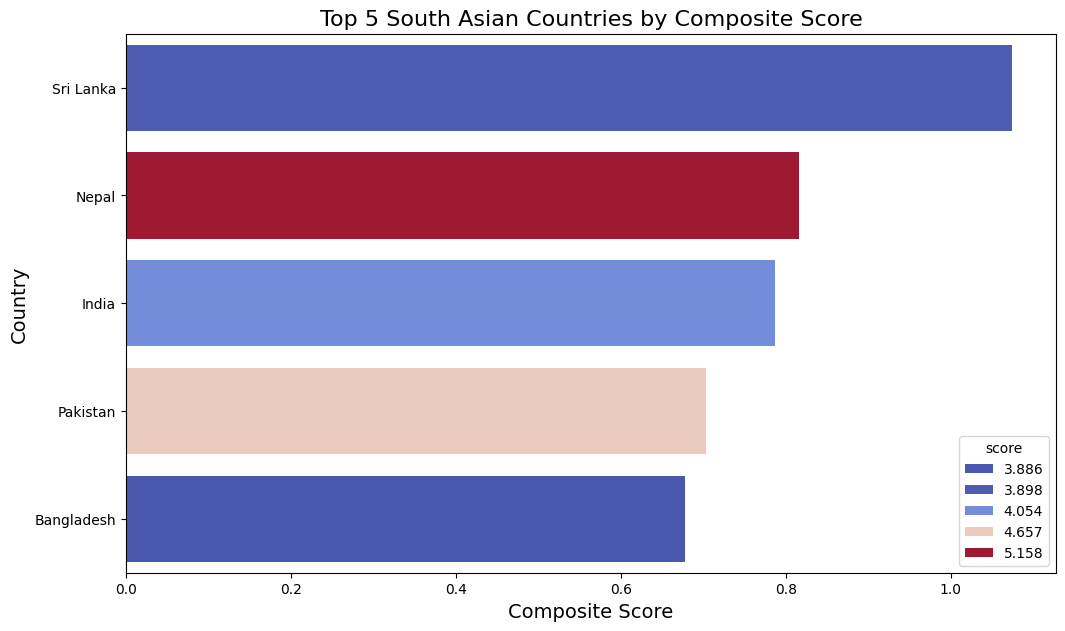

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

#Assuming 'south_asia_data' is a DataFrame containing the relevant data
top_5_countries = south_asia_data.head(5)

#Set the size of the plot
plt.figure(figsize=(12, 7))

#Create the horizontal bar plot using seaborn
sns.barplot(x=top_5_countries['Composite Score'], y=top_5_countries['Country name'],hue=top_5_countries['score'], palette='coolwarm')

#Set plot title and labels
plt.title('Top 5 South Asian Countries by Composite Score', fontsize=16)
plt.xlabel('Composite Score', fontsize=14)
plt.ylabel('Country', fontsize=14)

#Show the plot
plt.show()

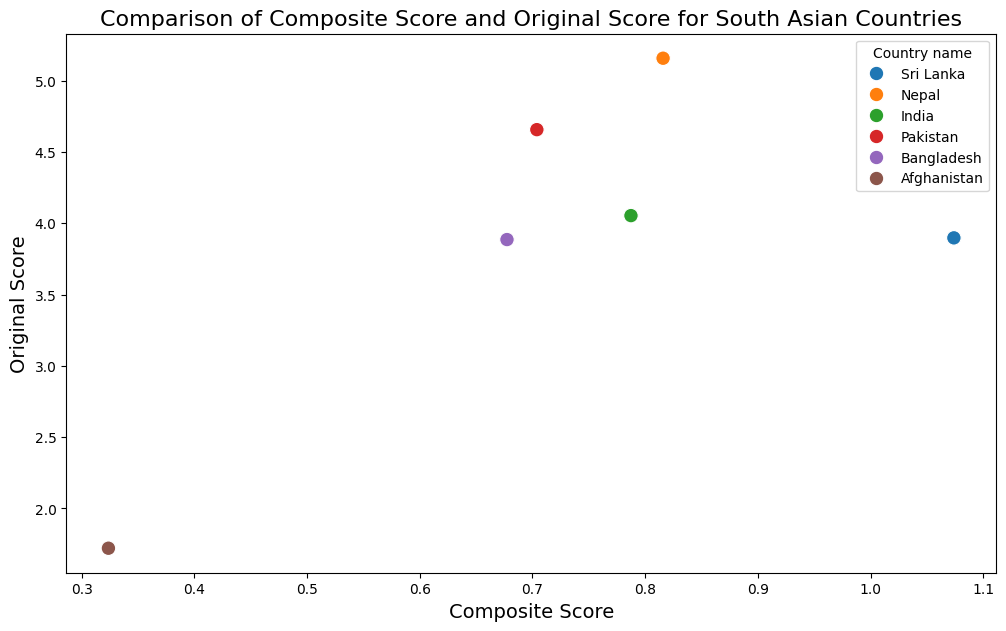

In [20]:
# 4. Compare with original Score
# Create a scatter plot to compare
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Composite Score',y='score',data=south_asia_data,hue='Country name',s=110)
plt.title('Comparison of Composite Score and Original Score for South Asian Countries',fontsize=16)
plt.xlabel('Composite Score', fontsize=14)
plt.ylabel('Original Score', fontsize=14)

plt.show()

Task- 3- Outlier Detection:
 Tasks:
 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
 2. Define outliers using the 1.5 × IQR rule.

In [21]:

# Calculate Q1, Q3, and IQR for Score and GDP per Capita
Q1_score = south_asia_data['score'].quantile(0.25)
Q3_score = south_asia_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asia_data['Log GDP per capita'].quantile(0.35)
Q3_gdp = south_asia_data['Log GDP per capita'].quantile(0.85)
IQR_gdp = Q3_gdp - Q1_gdp

# Define outlier boundaries
outlier_score_lower = Q1_score - 1.5 * IQR_score
outlier_score_upper = Q3_score + 1.5 * IQR_score
outlier_gdp_lower = Q1_gdp - 1.5 * IQR_gdp
outlier_gdp_upper = Q3_gdp + 1.5 * IQR_gdp

# Identify outliers
outliers = south_asia_data[
    (south_asia_data['score'] < outlier_score_lower) |
    (south_asia_data['score'] > outlier_score_upper) |
    (south_asia_data['Log GDP per capita'] < outlier_gdp_lower) |
    (south_asia_data['Log GDP per capita'] > outlier_gdp_upper)
]


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

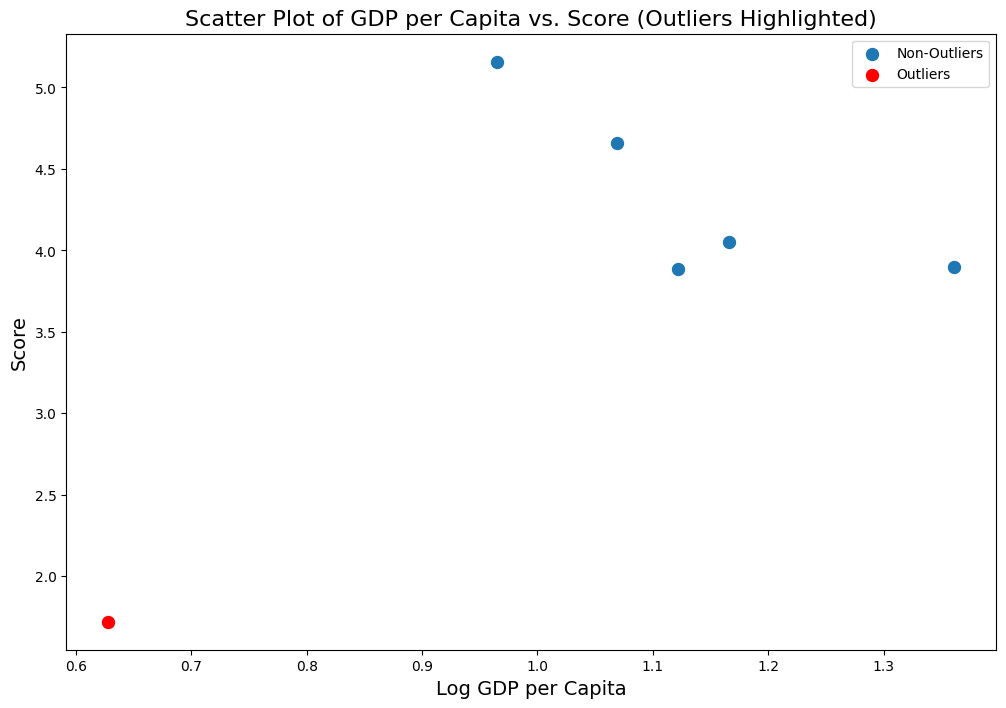

Outlier Analysis:
Outliers Found:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Characteristics of Outliers:
- Countries with significantly high or low 'Score' relative to others are outliers. Thresholds: Below 2.96 or above 5.43
- Countries with significantly high or low 'Log GDP per capita' relative to others are outliers. Thresholds: Below 0.79 or above 1.47

Possible Effects on Regional Metrics:
- Outliers can substantially affect the mean and standard deviation of both 'Score' and 'Log GDP per capita' for the South Asia region.
- Extreme outliers, whether very high or very low, might distort the perception of regional prosperity or happiness.
- Median values can serve as a more reliable central measure in the presence of outliers since they are less impacted by extreme values.
- It's important to account for outliers when analyzing or making decisions based on regional averages.
- For instance, a country with an abnormally high 'Log GDP p

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot non-outliers
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=south_asia_data[~south_asia_data.index.isin(outliers.index)],
    label='Non-Outliers',
    s=110
)

# Plot outliers
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=outliers,
    label='Outliers',
    color='red',
    s=110
)

plt.title('Scatter Plot of GDP per Capita vs. Score (Outliers Highlighted)', fontsize=16)
plt.xlabel('Log GDP per Capita', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend()

plt.show()

# Discuss the characteristics of these outliers and their potential impact on regional averages
print("Outlier Analysis:")
if outliers.empty:
    print("No outliers identified in the South Asia dataset based on the 1.5 x IQR criterion for Score and GDP per Capita.")
else:
    print("Outliers Found:")
    print(outliers[['Country name', 'score', 'Log GDP per capita']])

    print("\nCharacteristics of Outliers:")
    outlier_description_score = (
        f"- Countries with significantly high or low 'Score' relative to others are outliers. "
        f"Thresholds: Below {outlier_score_lower:.2f} or above {outlier_score_upper:.2f}"
    )
    outlier_description_gdp = (
        f"- Countries with significantly high or low 'Log GDP per capita' relative to others are outliers. "
        f"Thresholds: Below {outlier_gdp_lower:.2f} or above {outlier_gdp_upper:.2f}"
    )
    print(outlier_description_score)
    print(outlier_description_gdp)

    print("\nPossible Effects on Regional Metrics:")
    regional_impact_messages = [
        "- Outliers can substantially affect the mean and standard deviation of both 'Score' and 'Log GDP per capita' for the South Asia region.",
        "- Extreme outliers, whether very high or very low, might distort the perception of regional prosperity or happiness.",
        "- Median values can serve as a more reliable central measure in the presence of outliers since they are less impacted by extreme values.",
        "- It's important to account for outliers when analyzing or making decisions based on regional averages.",
        "- For instance, a country with an abnormally high 'Log GDP per capita' might inflate the perceived economic status of the entire region."
    ]
    for message in regional_impact_messages:
        print(message)


Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Pearson correlation between Score and Freedom to make life choices: 0.80
Pearson correlation between Score and Generosity: 0.87


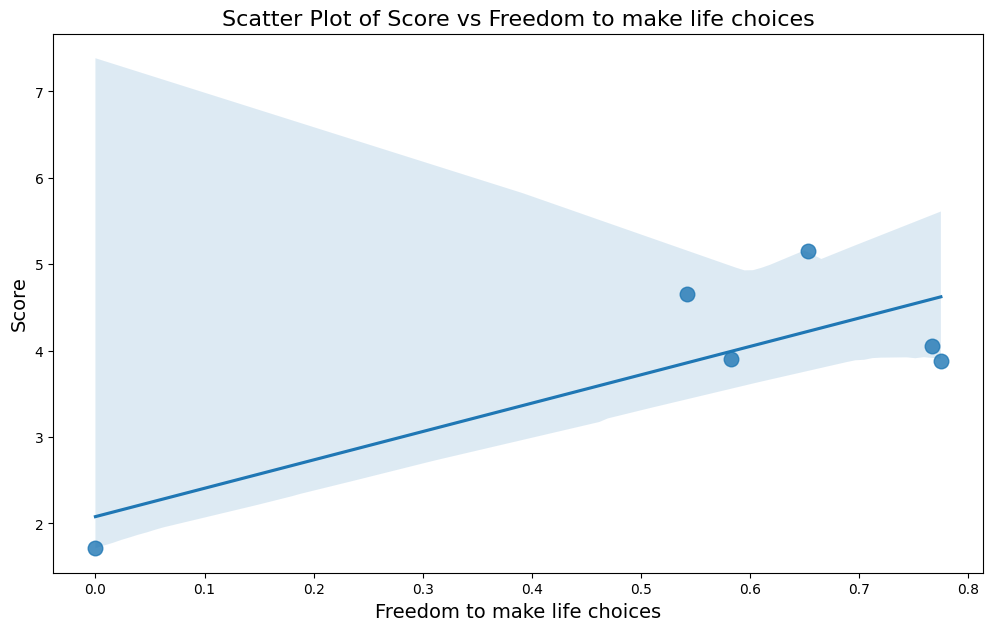

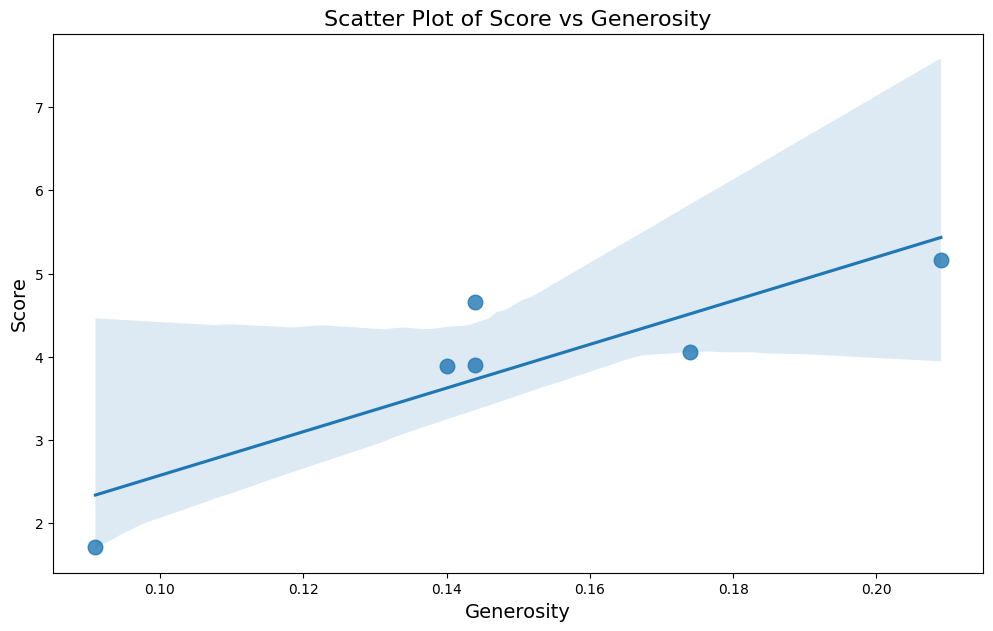


The strongest relationship with Score is with Generosity (correlation: 0.87)
The weakest relationship with Score is with Freedom to make life choices (correlation: 0.80)

Analysis Discussion:
The Pearson correlation coefficient quantifies the strength and direction of a linear relationship between two variables.
Values nearing +1 or -1 indicate a strong positive or negative relationship, respectively, whereas values close to 0 signify weak or no linear association.
From the computed correlations, Generosity demonstrates a stronger association with the Score in comparison to Freedom to make life choices.
Scatter plots with trendlines provide a visual representation of these relationships. A steeper trendline suggests a stronger connection, whereas a flatter trendline implies a weaker correlation.
It is essential to recognize that correlation does not establish causation. Even a strong correlation between a variable and the Score does not guarantee that one directly influences changes i

In [25]:

# 1. Calculate Pearson correlation
# Choose two metrics: 'Freedom to make life choices' and 'Generosity'
metric1 = 'Freedom to make life choices'
metric2 = 'Generosity'

correlation1 = south_asia_data['score'].corr(south_asia_data[metric1])
correlation2 = south_asia_data['score'].corr(south_asia_data[metric2])

print(f"Pearson correlation between Score and {metric1}: {correlation1:.2f}")
print(f"Pearson correlation between Score and {metric2}: {correlation2:.2f}")

# 2. Create scatter plots with trendlines
# Scatter plot for Score vs. Freedom to make life choices
plt.figure(figsize=(12, 7))
sns.regplot(x=metric1, y='score', data=south_asia_data, scatter_kws={'s': 110})
plt.title(f'Scatter Plot of Score vs {metric1}', fontsize=16)
plt.xlabel(metric1, fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.show()

# Scatter plot for Score vs. Generosity
plt.figure(figsize=(12, 7))
sns.regplot(x=metric2, y='score', data=south_asia_data, scatter_kws={'s': 110})
plt.title(f'Scatter Plot of Score vs {metric2}', fontsize=16)
plt.xlabel(metric2, fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.show()

# 3. Identify and discuss relationships
# Determine strongest and weakest relationships
correlations = {
    metric1: correlation1,
    metric2: correlation2,
}

strongest_metric = max(correlations, key=correlations.get)
weakest_metric = min(correlations, key=correlations.get)

print(f"\nThe strongest relationship with Score is with {strongest_metric} (correlation: {correlations[strongest_metric]:.2f})")
print(f"The weakest relationship with Score is with {weakest_metric} (correlation: {correlations[weakest_metric]:.2f})")

# Discuss relationships
print("\nAnalysis Discussion:")
print("The Pearson correlation coefficient quantifies the strength and direction of a linear relationship between two variables.")
print("Values nearing +1 or -1 indicate a strong positive or negative relationship, respectively, whereas values close to 0 signify weak or no linear association.")
print(f"From the computed correlations, {strongest_metric} demonstrates a stronger association with the Score in comparison to {weakest_metric}.")
print("Scatter plots with trendlines provide a visual representation of these relationships. A steeper trendline suggests a stronger connection, whereas a flatter trendline implies a weaker correlation.")
print("It is essential to recognize that correlation does not establish causation. Even a strong correlation between a variable and the Score does not guarantee that one directly influences changes in the other.")


 Task- 5- Gap Analysis:
 Tasks:
 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
 for each South Asian country.
 2. Rank the South Asian countries by this gap in both ascending and descending order.
 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
 4. Analyze the reasons behind these gaps and their implications for South Asian countries.

South Asian Countries Ranked by GDP-Score Gap (Ascending):

    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

South Asian Countries Ranked by GDP-Score Gap (Descending):

    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


<ipython-input-26-e1e3eb267ccb>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y='GDP-Score Gap', data=combined_top_gaps, palette='coolwarm')


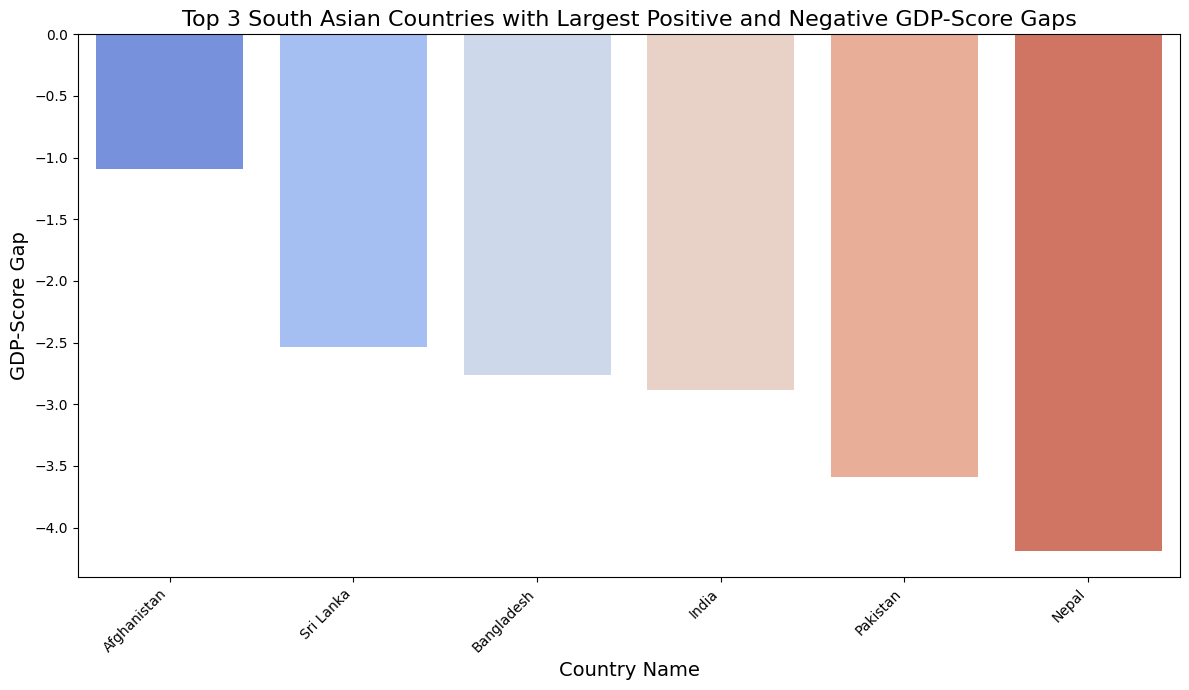


GDP-Score Gap Analysis:
The 'GDP-Score Gap' highlights the disparity between a country's GDP per capita and its happiness score. A positive gap indicates that a country’s GDP per capita is higher than what might be expected based on its happiness score, while a negative gap suggests the opposite.

Factors Contributing to Positive Gaps (High GDP, Lower Score):
- Wealth concentration: A high GDP per capita may not reflect broad economic benefits if wealth is unequally distributed.
- Social or environmental challenges: Issues like inequality, insufficient social support, restricted freedoms, or environmental harm can reduce happiness despite high economic output.
- Governance and corruption: Poor governance or prevalent corruption can undermine social trust and well-being, negatively impacting happiness scores.
- Unsustainable economic growth: Rapid economic development at the expense of social equity or environmental sustainability can lead to higher GDP but lower happiness levels.

Fac

In [26]:
# 1. Add a new column, GDP-Score Gap
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

# 2. Rank the South Asian countries by this gap in both ascending and descending order.
south_asia_data_asc = south_asia_data.sort_values(by='GDP-Score Gap', ascending=True)
south_asia_data_desc = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

print("South Asian Countries Ranked by GDP-Score Gap (Ascending):\n")
print(south_asia_data_asc[['Country name', 'GDP-Score Gap']])
print("\nSouth Asian Countries Ranked by GDP-Score Gap (Descending):\n")
print(south_asia_data_desc[['Country name', 'GDP-Score Gap']])

# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
top_3_positive = south_asia_data_desc.head(3)
top_3_negative = south_asia_data_asc.head(3)

# Combine the top 3 positive and negative gap countries
combined_top_gaps = pd.concat([top_3_positive, top_3_negative]).sort_values(by='GDP-Score Gap',ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Country name', y='GDP-Score Gap', data=combined_top_gaps, palette='coolwarm')
plt.title('Top 3 South Asian Countries with Largest Positive and Negative GDP-Score Gaps', fontsize=16)
plt.xlabel('Country Name', fontsize=14)
plt.ylabel('GDP-Score Gap', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Analyze the reasons behind these gaps and their implications for South Asian countries.
print("\nGDP-Score Gap Analysis:")
print("The 'GDP-Score Gap' highlights the disparity between a country's GDP per capita and its happiness score. A positive gap indicates that a country’s GDP per capita is higher than what might be expected based on its happiness score, while a negative gap suggests the opposite.")

print("\nFactors Contributing to Positive Gaps (High GDP, Lower Score):")
print("- Wealth concentration: A high GDP per capita may not reflect broad economic benefits if wealth is unequally distributed.")
print("- Social or environmental challenges: Issues like inequality, insufficient social support, restricted freedoms, or environmental harm can reduce happiness despite high economic output.")
print("- Governance and corruption: Poor governance or prevalent corruption can undermine social trust and well-being, negatively impacting happiness scores.")
print("- Unsustainable economic growth: Rapid economic development at the expense of social equity or environmental sustainability can lead to higher GDP but lower happiness levels.")

print("\nFactors Contributing to Negative Gaps (Lower GDP, Higher Score):")
print("- Strong community and social ties: Close-knit family and community relationships can boost well-being even with lower economic indicators.")
print("- Cultural influences: Cultural priorities such as mindfulness, contentment, and harmony can enhance happiness regardless of economic status.")
print("- Quality governance and social systems: Effective governance and efficient use of resources can provide a high quality of life even with limited economic means.")
print("- Focus on sustainable practices: Countries emphasizing sustainability and equity may achieve higher happiness despite lower GDP per capita.")

print("\nRelevance for South Asian Nations:")
print("- Policy implications: Governments should aim to enhance not only GDP growth but also equitable wealth distribution, robust social systems, environmental conservation, and governance reforms.")
print("- Cultural context: Understanding the cultural aspects influencing happiness can guide the creation of tailored policies to address unique regional challenges. For example, some nations may prioritize improving social freedoms, while others might focus on governance improvements.")
print("- Inclusive and sustainable development: Emphasizing equitable economic growth and sustainable practices can result in improved happiness scores.")
print("- Reducing disparities: Addressing income and social inequality is key to translating economic progress into widespread well-being.")
